In [1]:
#https://www.datatechnotes.com/2019/12/multi-output-regression-example-with.html

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [53]:
#df = pd.read_csv('Combined_Ankara_full.csv')
df = pd.read_csv('Combined_Ankara_non-binary.csv')

df.head(5)

,Floor Area,Floor Number,#ofPeople,schedule_recorded,total_window_area,Heating,Lighting,Equipment
0,103.037993,1,0.019410,0,15.70,53.25,17.33,5.76
1,84.290021,0,0.059319,3,14.46,58.98,17.98,5.76
2,101.739004,0,0.029487,3,15.42,49.60,17.47,5.76
3,135.790398,2,0.014729,1,17.51,85.46,16.14,5.76
4,74.756213,1,0.040130,0,13.90,77.74,16.83,5.76


In [54]:
# Convert to numpy 
X = df.columns.drop('Heating').drop('Lighting').drop('Equipment')
#X = df.columns.drop('Cooling').drop('Heating').drop('Lighting')
X = df[X].values
X.shape[0]

5928

In [55]:
from numpy import vstack
y1 = df.Heating.values.reshape(X.shape[0],1)
y2 = df.Lighting.values.reshape(X.shape[0],1)
#y3 = df.ofPeople_bedroom
Y = hstack((y1,y2))
#Y = hstack((y1,y2))


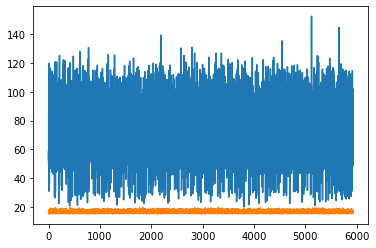

In [56]:
#plt.plot(y1)
#plt.plot(y2)
plt.plot(Y)
plt.show()

In [57]:
print("X:", X.shape, "Y:", Y.shape)

X: (5928, 5) Y: (5928, 2)


In [86]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() 
X = min_max_scaler.fit_transform(X)
Y = min_max_scaler.fit_transform(Y)

X_train, X_val_and_test, Y_train, Y_val_and_test=train_test_split(X, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers, optimizers

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)


#Ankara full
model = Sequential()
model.add(Dense(200, input_dim=X.shape[1], activation="relu"))
model.add(Dense(200, activation="relu",kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dense(100, activation="relu",kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(200, activation="relu"))
model.add(Dense(Y.shape[1]))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy', 'mse'])
 
model.summary()
'''



#Ankara non-binary
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation="relu"))
model.add(Dense(100, activation="relu",kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(0.2))
model.add(Dense(100, activation="relu",kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(Y.shape[1]))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy', 'mse'])
 
model.summary()
'''

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 200)               1200      
_________________________________________________________________
dense_64 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_65 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_67 (Dense)             (None, 2)                 402       
Total params: 122,202
Trainable params: 122,202
Non-trainable params: 0
_______________________________________________

'\n\n\n\n#Ankara non-binary\nmodel = Sequential()\nmodel.add(Dense(100, input_dim=X.shape[1], activation="relu"))\nmodel.add(Dense(100, activation="relu",kernel_regularizer=regularizers.l2(0.001)))\n#model.add(Dropout(0.2))\nmodel.add(Dense(100, activation="relu",kernel_regularizer=regularizers.l2(0.001)))\nmodel.add(Dense(Y.shape[1]))\nmodel.compile(loss="mse", optimizer="adam", metrics=[\'accuracy\', \'mse\'])\n \nmodel.summary()\n'

In [88]:
model.fit(X_train, Y_train, epochs=500, batch_size=32, verbose=1, validation_data=(X_val, Y_val))

Train on 4742 samples, validate on 593 samples
Epoch 1/500
4742/4742 [==============================] - 1s 178us/step - loss: 0.0927 - accuracy: 0.8754 - mse: 0.0197 - val_loss: 0.0302 - val_accuracy: 0.8904 - val_mse: 0.0120
Epoch 2/500
4742/4742 [==============================] - 1s 115us/step - loss: 0.0224 - accuracy: 0.8922 - mse: 0.0129 - val_loss: 0.0170 - val_accuracy: 0.8921 - val_mse: 0.0123
Epoch 3/500
4742/4742 [==============================] - 1s 127us/step - loss: 0.0155 - accuracy: 0.8935 - mse: 0.0125 - val_loss: 0.0141 - val_accuracy: 0.8988 - val_mse: 0.0122
Epoch 4/500
4742/4742 [==============================] - 0s 105us/step - loss: 0.0136 - accuracy: 0.8986 - mse: 0.0121 - val_loss: 0.0126 - val_accuracy: 0.8971 - val_mse: 0.0115
Epoch 5/500
4742/4742 [==============================] - 1s 115us/step - loss: 0.0127 - accuracy: 0.8994 - mse: 0.0118 - val_loss: 0.0120 - val_accuracy: 0.9056 - val_mse: 0.0113
Epoch 6/500
4742/4742 [==============================] - 1

4742/4742 [==============================] - 0s 103us/step - loss: 0.0105 - accuracy: 0.9093 - mse: 0.0103 - val_loss: 0.0101 - val_accuracy: 0.9191 - val_mse: 0.0099
Epoch 47/500
4742/4742 [==============================] - 0s 95us/step - loss: 0.0105 - accuracy: 0.9097 - mse: 0.0103 - val_loss: 0.0102 - val_accuracy: 0.9191 - val_mse: 0.0100
Epoch 48/500
4742/4742 [==============================] - 0s 89us/step - loss: 0.0104 - accuracy: 0.9093 - mse: 0.0102 - val_loss: 0.0108 - val_accuracy: 0.9157 - val_mse: 0.0106
Epoch 49/500
4742/4742 [==============================] - 0s 89us/step - loss: 0.0104 - accuracy: 0.9093 - mse: 0.0102 - val_loss: 0.0101 - val_accuracy: 0.9157 - val_mse: 0.0099
Epoch 50/500
4742/4742 [==============================] - 0s 86us/step - loss: 0.0104 - accuracy: 0.9091 - mse: 0.0102 - val_loss: 0.0101 - val_accuracy: 0.9140 - val_mse: 0.0099
Epoch 51/500
4742/4742 [==============================] - 0s 87us/step - loss: 0.0104 - accuracy: 0.9095 - mse: 0.010

Epoch 92/500
4742/4742 [==============================] - 0s 99us/step - loss: 0.0103 - accuracy: 0.9100 - mse: 0.0102 - val_loss: 0.0101 - val_accuracy: 0.9157 - val_mse: 0.0099
Epoch 93/500
4742/4742 [==============================] - 0s 103us/step - loss: 0.0102 - accuracy: 0.9102 - mse: 0.0101 - val_loss: 0.0101 - val_accuracy: 0.9191 - val_mse: 0.0099
Epoch 94/500
4742/4742 [==============================] - 0s 90us/step - loss: 0.0103 - accuracy: 0.9095 - mse: 0.0101 - val_loss: 0.0107 - val_accuracy: 0.9089 - val_mse: 0.0105
Epoch 95/500
4742/4742 [==============================] - 0s 85us/step - loss: 0.0103 - accuracy: 0.9078 - mse: 0.0102 - val_loss: 0.0102 - val_accuracy: 0.9157 - val_mse: 0.0100
Epoch 96/500
4742/4742 [==============================] - 0s 87us/step - loss: 0.0102 - accuracy: 0.9093 - mse: 0.0101 - val_loss: 0.0102 - val_accuracy: 0.9191 - val_mse: 0.0100
Epoch 97/500
4742/4742 [==============================] - 0s 87us/step - loss: 0.0103 - accuracy: 0.9070

4742/4742 [==============================] - 0s 86us/step - loss: 0.0102 - accuracy: 0.9091 - mse: 0.0101 - val_loss: 0.0104 - val_accuracy: 0.9106 - val_mse: 0.0102
Epoch 138/500
4742/4742 [==============================] - 0s 88us/step - loss: 0.0101 - accuracy: 0.9102 - mse: 0.0100 - val_loss: 0.0104 - val_accuracy: 0.9140 - val_mse: 0.0102
Epoch 139/500
4742/4742 [==============================] - 0s 85us/step - loss: 0.0101 - accuracy: 0.9066 - mse: 0.0100 - val_loss: 0.0101 - val_accuracy: 0.9191 - val_mse: 0.0100
Epoch 140/500
4742/4742 [==============================] - 0s 87us/step - loss: 0.0101 - accuracy: 0.9097 - mse: 0.0100 - val_loss: 0.0103 - val_accuracy: 0.9191 - val_mse: 0.0101
Epoch 141/500
4742/4742 [==============================] - 0s 84us/step - loss: 0.0101 - accuracy: 0.9081 - mse: 0.0100 - val_loss: 0.0101 - val_accuracy: 0.9207 - val_mse: 0.0100
Epoch 142/500
4742/4742 [==============================] - 0s 92us/step - loss: 0.0101 - accuracy: 0.9093 - mse: 0

4742/4742 [==============================] - 0s 101us/step - loss: 0.0101 - accuracy: 0.9072 - mse: 0.0100 - val_loss: 0.0103 - val_accuracy: 0.9157 - val_mse: 0.0102
Epoch 183/500
4742/4742 [==============================] - 0s 98us/step - loss: 0.0101 - accuracy: 0.9093 - mse: 0.0099 - val_loss: 0.0100 - val_accuracy: 0.9157 - val_mse: 0.0099
Epoch 184/500
4742/4742 [==============================] - 0s 100us/step - loss: 0.0101 - accuracy: 0.9119 - mse: 0.0100 - val_loss: 0.0101 - val_accuracy: 0.9207 - val_mse: 0.0100
Epoch 185/500
4742/4742 [==============================] - 0s 99us/step - loss: 0.0101 - accuracy: 0.9085 - mse: 0.0100 - val_loss: 0.0101 - val_accuracy: 0.9157 - val_mse: 0.0100
Epoch 186/500
4742/4742 [==============================] - 1s 111us/step - loss: 0.0100 - accuracy: 0.9091 - mse: 0.0099 - val_loss: 0.0102 - val_accuracy: 0.9191 - val_mse: 0.0101
Epoch 187/500
4742/4742 [==============================] - 1s 110us/step - loss: 0.0101 - accuracy: 0.9112 - ms

4742/4742 [==============================] - 0s 91us/step - loss: 0.0101 - accuracy: 0.9089 - mse: 0.0099 - val_loss: 0.0102 - val_accuracy: 0.9174 - val_mse: 0.0100
Epoch 228/500
4742/4742 [==============================] - 0s 93us/step - loss: 0.0101 - accuracy: 0.9087 - mse: 0.0100 - val_loss: 0.0103 - val_accuracy: 0.9224 - val_mse: 0.0102
Epoch 229/500
4742/4742 [==============================] - 0s 93us/step - loss: 0.0100 - accuracy: 0.9095 - mse: 0.0099 - val_loss: 0.0100 - val_accuracy: 0.9140 - val_mse: 0.0099
Epoch 230/500
4742/4742 [==============================] - 0s 94us/step - loss: 0.0101 - accuracy: 0.9085 - mse: 0.0100 - val_loss: 0.0102 - val_accuracy: 0.9140 - val_mse: 0.0101
Epoch 231/500
4742/4742 [==============================] - 0s 93us/step - loss: 0.0100 - accuracy: 0.9108 - mse: 0.0099 - val_loss: 0.0101 - val_accuracy: 0.9207 - val_mse: 0.0100
Epoch 232/500
4742/4742 [==============================] - 0s 91us/step - loss: 0.0100 - accuracy: 0.9106 - mse: 0

4742/4742 [==============================] - 0s 94us/step - loss: 0.0102 - accuracy: 0.9095 - mse: 0.0100 - val_loss: 0.0101 - val_accuracy: 0.9191 - val_mse: 0.0100
Epoch 273/500
4742/4742 [==============================] - 0s 98us/step - loss: 0.0101 - accuracy: 0.9091 - mse: 0.0100 - val_loss: 0.0101 - val_accuracy: 0.9140 - val_mse: 0.0099
Epoch 274/500
4742/4742 [==============================] - 0s 85us/step - loss: 0.0101 - accuracy: 0.9100 - mse: 0.0100 - val_loss: 0.0100 - val_accuracy: 0.9157 - val_mse: 0.0099
Epoch 275/500
4742/4742 [==============================] - 0s 94us/step - loss: 0.0102 - accuracy: 0.9085 - mse: 0.0100 - val_loss: 0.0101 - val_accuracy: 0.9174 - val_mse: 0.0100
Epoch 276/500
4742/4742 [==============================] - 1s 118us/step - loss: 0.0101 - accuracy: 0.9078 - mse: 0.0099 - val_loss: 0.0100 - val_accuracy: 0.9191 - val_mse: 0.0099
Epoch 277/500
4742/4742 [==============================] - 0s 104us/step - loss: 0.0101 - accuracy: 0.9095 - mse:

KeyboardInterrupt: 

In [90]:
from sklearn import metrics

ypred = model.predict(X_test)
print("y1 MAE:%.4f" % metrics.mean_absolute_error(Y_test[:,0], ypred[:,0])) 
print("y2 MAE:%.4f" % metrics.mean_absolute_error(Y_test[:,1], ypred[:,1]))

print("y1 r2:%.4f" % metrics.r2_score(Y_test[:,0], ypred[:,0])) 
print("y2 r2:%.4f" % metrics.r2_score(Y_test[:,1], ypred[:,1]))


print("y1 RMSE:%.4f" % np.sqrt(metrics.mean_squared_error(Y_test[:,0], ypred[:,0]))) 
print("y2 RMSE:%.4f" % np.sqrt(metrics.mean_squared_error(Y_test[:,1], ypred[:,1]))) 


y1 MAE:0.0304
y2 MAE:0.0984
y1 r2:0.9356
y2 r2:0.6345
y1 RMSE:0.0396
y2 RMSE:0.1329


In [92]:
#np.savetxt('array.csv', np.column_stack((ytest, ypred)))

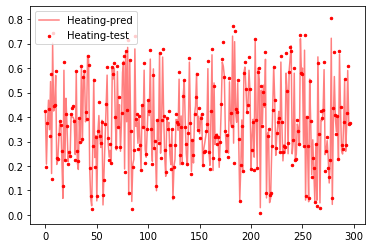

<Figure size 3600x1800 with 0 Axes>

In [51]:
x_ax = range(len(X_test))
plt.scatter(x_ax, Y_test[:,0],  s=6, label="Heating-test", c='red')
plt.plot(x_ax, ypred[:,0], label="Heating-pred", alpha=0.50, c='red')
#plt.scatter(x_ax, Y_test[:,1],  s=6, label="Lighting-test", c='orange')
#plt.plot(x_ax, ypred[:,1], label="Lighting-pred", c='orange', alpha=0.50)
#plt.scatter(x_ax, Y_test[:,2],  s=6, label="Lighting-test", c='yellow')
#plt.plot(x_ax, ypred[:,2], label="Lighting-pred", c='yellow', alpha=0.50)
plt.legend()
plt.figure(dpi=300, figsize=(12,6))
plt.show()

In [139]:
#TODO apply record to csv to compare test and pred values
# apply train test division
# apply multiple metrics
# apply train-val graphic how they are developing